<a href="https://colab.research.google.com/github/Tipimenta/Bootcamp-Unimed-BH-Ciencia-de-Dados-DiO/blob/master/ANALISE_EXPLORATORIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Análise de dados com Python e Pandas
#### Este projeto é destinado a análise e manipulação de dados de duas bases de dados:
* A primeira base de dados contem arquivos no formato xlsx com informações sobre vendas de produtos de lojas em algumas cidades do nordeste.  
* A segunda base de dados  contem um arquivo com o nome "AdventureWorks" no formato xlsx  com informações sobre vendas de um produto entre diferentes lojas separadas por um ID correspondente.

####  As análises serão realizadas com a biblioteca pandas e também para a visualização dos dados usaremos a biblioteca matplotlib

In [190]:
#Importando a biblioteca
import pandas as pd

## Análise de dados para a primeira base de dados
#### Base de dados:
* Aracaju.xlsx
* Fortaleza.xlsx
* Natal.xlsx
* Recife.xlsx
* Salvador.xlsx

In [191]:
#Leitura dos arquivos
df1 = pd.read_excel("/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/datasets/Natal.xlsx")
df4 = pd.read_excel("/datasets/Recife.xlsx")
df5 = pd.read_excel("/datasets/Salvador.xlsx")

In [192]:
type(df1)

pandas.core.frame.DataFrame

In [193]:
#concatenar os dataframes
df = pd.concat([df1,df2,df3,df4,df5])

In [194]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#### Análise exploratória de dados



In [195]:
print("Quantidade de valores missing:")
print(df.isnull().sum())

print("-"*30)

print("Tipo de dado de cada coluna:")

print(df.dtypes)

Quantidade de valores missing:
Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64
------------------------------
Tipo de dado de cada coluna:
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object


In [196]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [197]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [198]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [199]:
#Retornando as 5 maiores receita

df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.00,853,4,"3,544.00",4.00
51,Natal,2018-01-21,859.00,852,4,"3,436.00",4.00
55,Natal,2019-01-08,859.00,854,4,"3,436.00",4.00
30,Natal,2018-10-02,856.00,853,4,"3,424.00",4.00
41,Natal,2018-05-20,835.00,852,4,"3,340.00",4.00


In [200]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.00,853,4,"3,544.00",4.00
55,Natal,2019-01-08,859.00,854,4,"3,436.00",4.00
51,Natal,2018-01-21,859.00,852,4,"3,436.00",4.00
30,Natal,2018-10-02,856.00,853,4,"3,424.00",4.00
41,Natal,2018-05-20,835.00,852,4,"3,340.00",4.00
38,Natal,2018-02-25,828.00,852,4,"3,312.00",4.00
10,Natal,2018-10-27,828.00,852,4,"3,312.00",4.00
69,Natal,2019-03-24,817.00,852,4,"3,268.00",4.00
62,Natal,2018-02-10,793.00,854,4,"3,172.00",4.00
52,Natal,2018-04-27,778.00,854,4,"3,112.00",4.00


In [201]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [202]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018             118,176.53
2019             228,246.45
Name: Receita, dtype: float64

In [203]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

df["mes_venda"] = df["Data"].dt.month

df["dia_venda"] = df["Data"].dt.day

In [204]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,1.00,2019,1,1
38,Natal,2018-02-25,828.00,852,4,"3,312.00",4.00,2018,2,25
27,Aracaju,2018-01-01,3.39,1523,4,13.56,4.00,2018,1,1
192,Natal,2019-01-02,166.51,1036,1,166.51,1.00,2019,1,2
17,Natal,2018-02-18,276.00,854,3,828.00,3.00,2018,2,18


In [205]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [206]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [207]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [208]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [209]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.00,2019,3,2,425 days,1
129,Recife,2019-03-02,35.34,982,7,247.38,7.00,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.00,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,3.00,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.00,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,"2,604.00",3.00,2019,3,7,430 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.00,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.00,2019,3,2,425 days,1
4,Natal,2019-03-09,699.00,853,3,"2,097.00",3.00,2019,3,9,432 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.00,2019,3,2,425 days,1


#### Visualização dos dados

In [210]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

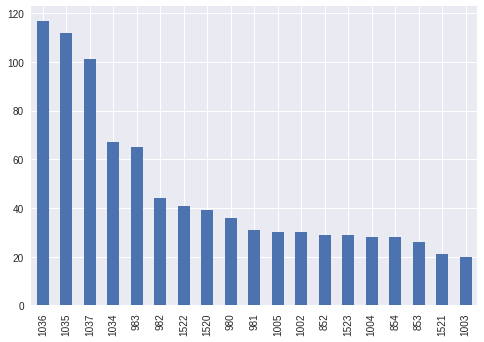

In [211]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

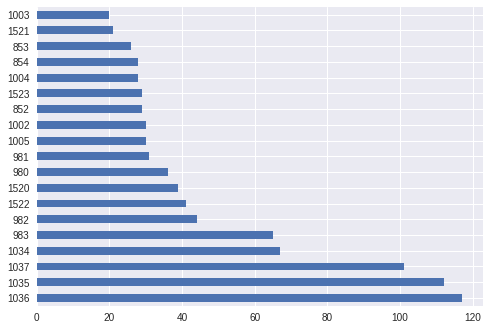

In [212]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

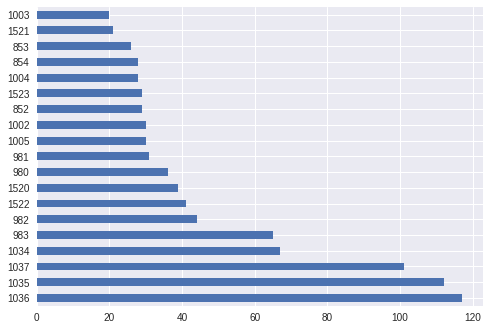

In [213]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

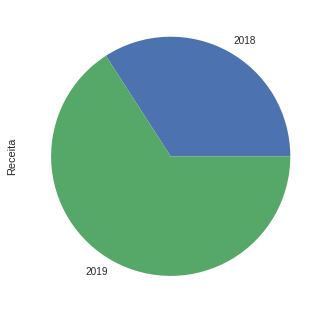

In [214]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [215]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

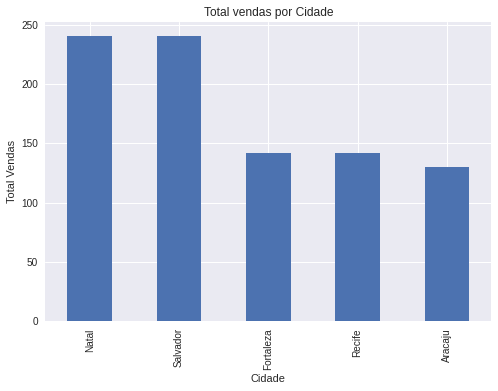

In [216]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

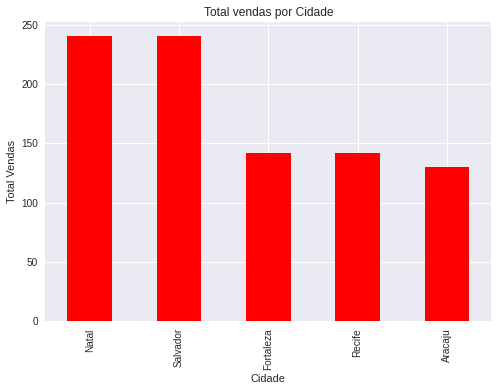

In [217]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [218]:
#Alterando o estilo
plt.style.use("ggplot")

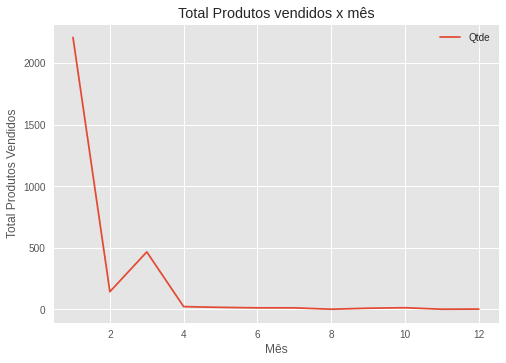

In [219]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [220]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [221]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [222]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

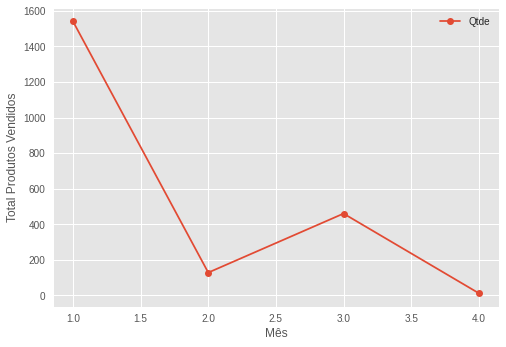

In [223]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

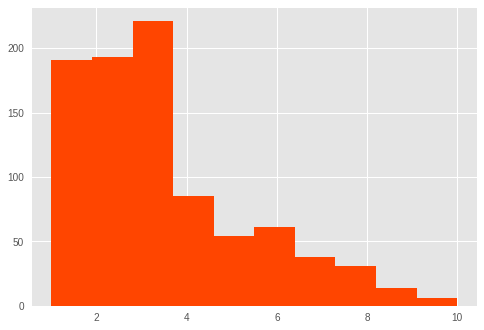

In [224]:
#Hisograma
plt.hist(df["Qtde"], color="orangered");

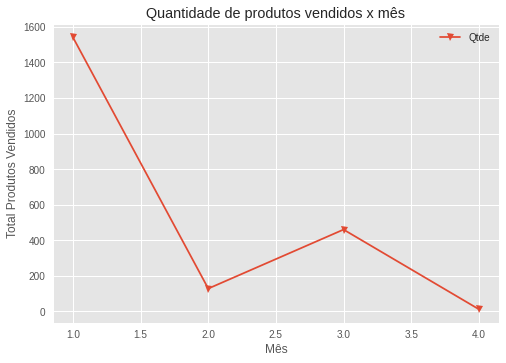

In [225]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

# Analise para a segunda base de dados 

* dataset: AdventureWorks.xlsx

In [226]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [227]:
#Uploud do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [228]:
#Criando nosso DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [229]:
#Visualizanado as 5 primeiras linahs
df.head()


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [230]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [231]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [232]:
#Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

In [233]:
#Qual o custo total?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna custo

In [234]:
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [235]:
#Qual o custo total?
round(df["Custo"].sum(), 2)

2486783.05

In [236]:
#Agora que temos a receita, custo e o total, podemos achar o lucro total
#Vamos criar uma coluna de lucro que será a Receita - CUsto
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [237]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [238]:
#Total Lucro
round(df["Lucro"].sum(), 2)

3497823.09

In [239]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [240]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


In [241]:
#Extraindo apenas od dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [242]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [243]:
#Verificando o tipo da coluna tempo_envio
df["Tempo_envio"].dtypes

dtype('int64')

In [244]:
#Média do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64

MISSING VALUES


In [245]:
#Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

E, Se a gente quiser saber o Luvro por Ano e Por MArca?

In [246]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [247]:
#Mudar o formato mostrado no float
pd.options.display.float_format = "{:20,.2f}".format

In [248]:
#Resetando o index e trazendo os dados no formato colunar
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

In [249]:
#Mostrando o resultado
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [250]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

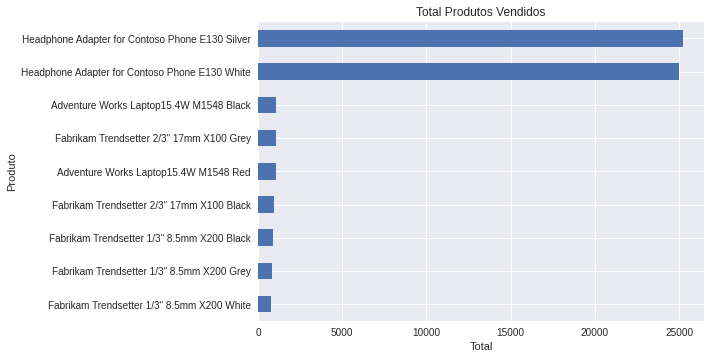

In [251]:
#Grafico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");


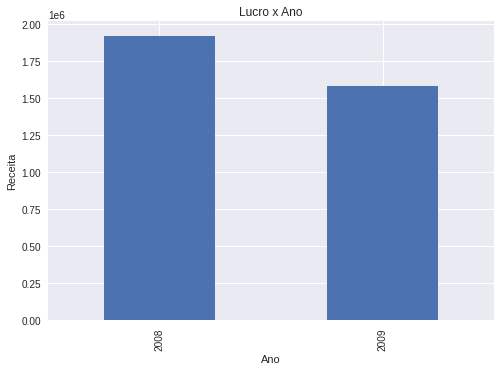

In [252]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [253]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()


Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [254]:
#Selecioannado apenas as vedas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [255]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


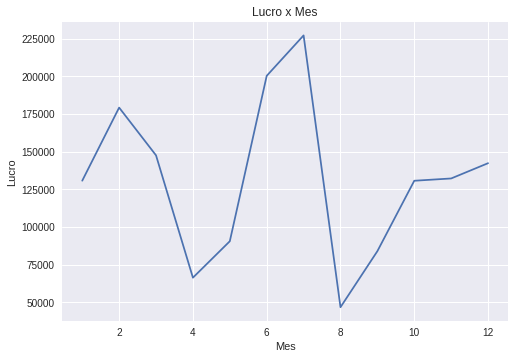

In [256]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mes")
plt.xlabel("Mes")
plt.ylabel("Lucro");

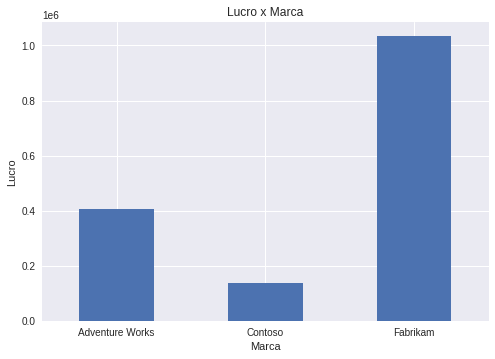

In [257]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

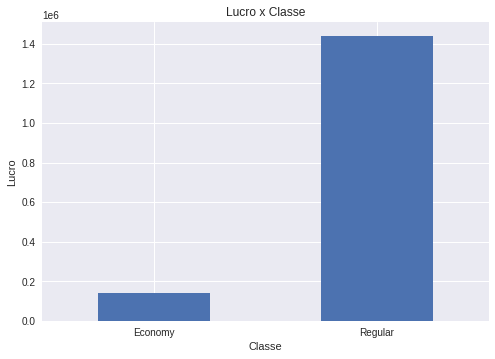

In [258]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [259]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

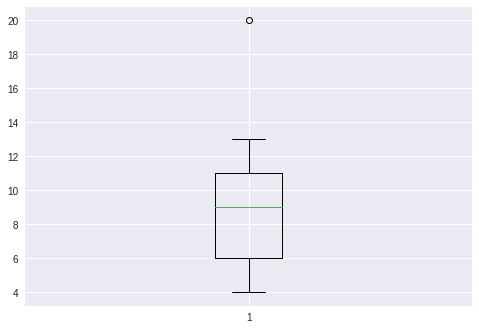

In [260]:
#Grafico de Boxplot
plt.boxplot(df["Tempo_envio"]);

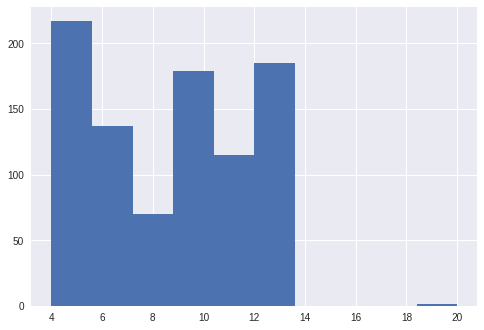

In [261]:
#Histograma
plt.hist(df["Tempo_envio"]);

In [262]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [263]:
#Tempo maximo de envio
df["Tempo_envio"].max()

20

In [264]:
#Identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [265]:
df.to_csv("df_vendas_novo.csv", index=False)